In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
#Giving a variable name of Data to the imported datasets Load_diabetes
data = load_diabetes()

In [4]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
#dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)

In [6]:
df['DiseaseProgression'] = data.target

In [7]:
#printing the first 5 row of the data
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [23]:
# Assigning all the values as X(input) without it affecting the target values
X = df[data.feature_names]

In [24]:
# Assigning X to the statsModel(sm) to add to the constant X. This means the feature_names = sm.add_consta
X = sm.add_constant(X)

In [25]:
#Assigning Y as our output(Target variable)
y = df['DiseaseProgression']

In [27]:
#Splitting the dataset to Training dataset and Testing datasets. Splitting the output and input. Meaning 80% train data, 20% test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0)

In [28]:
#State StatsModel to be used for the training. This is where the model starts to learn from the train data
model = sm.OLS(y_train, X_train).fit()

In [29]:
#Calculating the mean_squared_error. This is finding the squared values of original values vrs what is predicted.
mse = mean_squared_error(y_test, model.predict(X_test))

#Calculating the mean_absolute_error
mae = mean_absolute_error(y_test, model.predict(X_test))

#Calculating the root mean square error
rmse = np.sqrt(mse)


In [30]:
print("Mean Square Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Square Error:", rmse)

Mean Square Error: 3424.259334298682
Mean Absolute Error: 46.17358500370451
Root Mean Square Error: 58.51717127731553


In [31]:
#importing additional library
from sklearn.metrics import r2_score
# This is used to check accurancy of the values between 0 to 1. That is 0.2 means 20% accurate, 0.8 means 80% accurate
r_score = r2_score(y_test, model.predict(X_test))


In [32]:
print(r_score)

0.3322332173106204


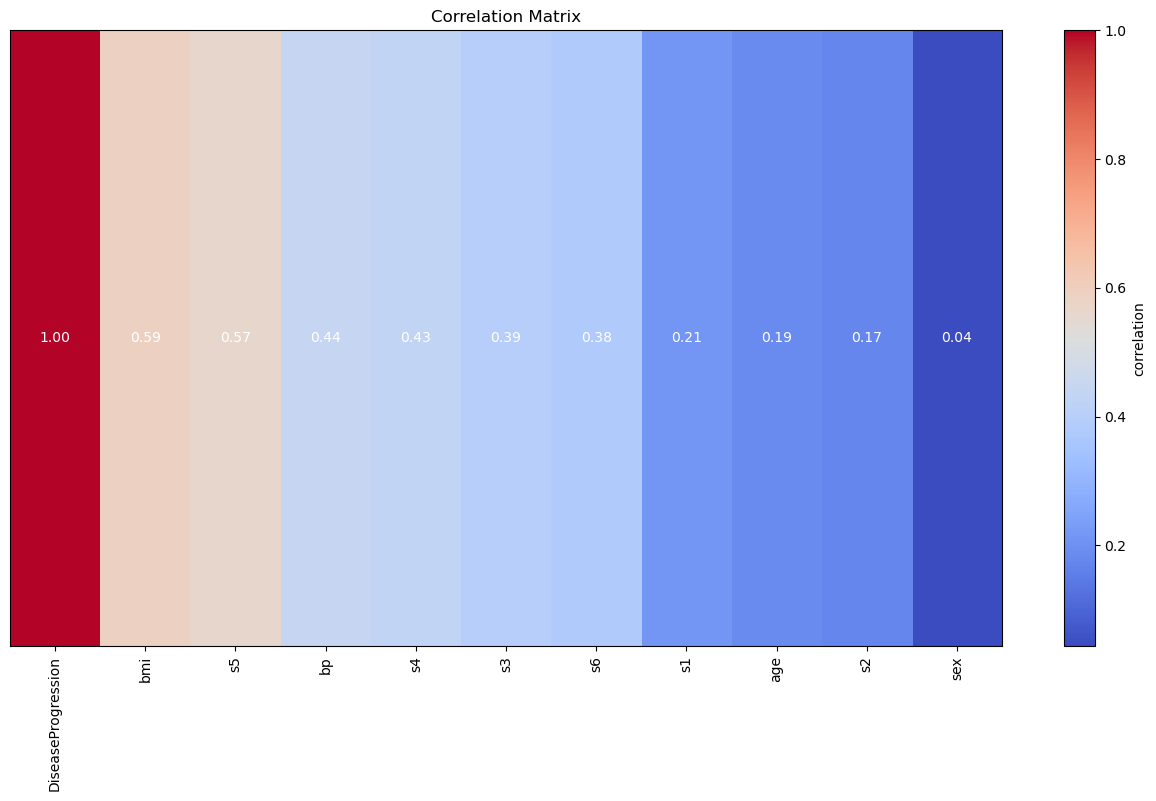

In [33]:
# since the results is 33%, lets use correlation to see if we can improve the performance

corr_matrix = df.corr()['DiseaseProgression'].abs().sort_values(ascending=False)

plt.figure(figsize=(16,8))
plt.imshow(np.array([corr_matrix.values]),cmap='coolwarm', aspect='auto')
plt.colorbar(label='correlation')
plt.title('Correlation Matrix')
plt.xticks(range(len(corr_matrix)),corr_matrix.index,rotation =90)
plt.yticks([])

for i in range(len(corr_matrix)):
    plt.text(i,0,f"{corr_matrix.iloc[i]:.2f}",ha='center', va='center',color='white')

plt.show()